In [1]:
#necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## * parse_dates = ['date'] as argument for read csv
## * create a function to repeatedly plot different makes ratings vs stock with the same set up 
## Also, you can automate the creation of graphs using a loop
##sns has hue parameter that allows to add additional dimension through color

## Saved with first column as index so add index_col=[0]

stocks = pd.read_csv('cleaned_data/date_symbol_open1.csv',index_col=[0])
stocks.head()

,Date,Symbol,Open
0,2009-12-31,TM,85.160004
1,2009-12-31,F,10.040000
2,2009-12-31,HMC,33.840000
3,2009-12-31,HYMTF,17.000000
4,2009-12-31,TTM,16.940001


In [3]:
cust_reviews = pd.read_csv('cleaned_data/review_x_symbol1.csv',index_col=[0])
cust_reviews['Company'].value_counts()

toyota           29679
ford             26228
chevrolet        25020
honda            21103
nissan           18894
hyundai          13640
volkswagen       12064
dodge            11452
mazda            11319
bmw              10296
kia               8758
mercedes-benz     8699
lexus             8681
jeep              8532
acura             8261
chrysler          7230
pontiac           7013
audi              6593
infiniti          5726
mitsubishi        5704
volvo             5698
cadillac          5120
buick             4758
lincoln           3741
mercury           3143
suzuki            3023
land-rover        2500
jaguar            2344
saab              2125
porsche           2104
gmc               1660
mini              1639
oldsmobile        1136
ram               1130
isuzu              945
subaru             806
fiat               553
tesla              453
maserati           318
alfa-romeo         221
bentley            168
ferrari            165
lotus              146
plymouth   

In [4]:
expert_reviews = pd.read_csv('cleaned_data/symbol_year_expert1.csv',index_col=[0])
expert_reviews['Company'].value_counts()

honda            48
toyota           48
bmw              48
hyundai          48
subaru           47
chevrolet        47
ford             46
mazda            46
kia              45
volkswagen       44
nissan           43
volvo            43
lexus            39
audi             38
buick            38
cadillac         36
mercedes-benz    36
acura            34
tesla            21
Name: Company, dtype: int64

In [24]:
#comparison of expert vs customer reviews avg's
## cust reviews has to be multiplied by two 

##visualize with superimposed bar graph

customer = cust_reviews[['Company','Rating']].groupby('Company').mean().apply(lambda x: x*2).sort_values(by='Rating')
expert = expert_reviews[['Company','Expert_rating']].groupby('Company').mean().sort_values(by='Expert_rating')
result_review1 = customer.merge(expert, how='left', on ='Company')
result_review1.dropna(inplace=True)
result_review1.describe()


,Rating,Expert_rating
count,19.000000,19.000000
mean,8.070068,8.193453
std,0.255180,0.203084
min,7.692726,7.882353
25%,7.886500,8.036628
50%,8.062891,8.195652
75%,8.246120,8.322841
max,8.653422,8.661905


<AxesSubplot:xlabel='Company'>

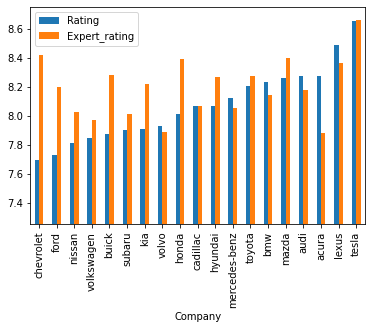

In [20]:
## no obvious conclusion, they dont seem to match, 
## maybe clearer trend if subdivided by year 

##sort by diff between rating and expert_rating

result_review1.plot.bar(ylim=[7.25,8.75])

In [ ]:
## I would want to grab maybe a couple of makes and track stock performance along side expert and customer reviews 
## so as to have three lines over time 